# Jupyter Notebook 1: Load Data and Train

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sys
import util_loss as ul
import scvelo as scv

#import the package to use
import beta_vae
import dhsic_vae

Using TensorFlow backend.


Kang Dataset

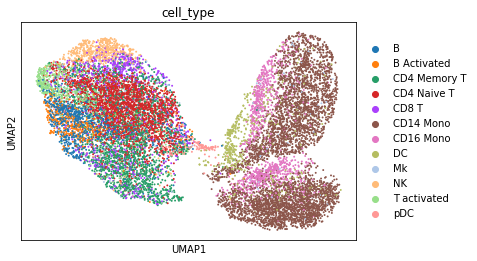

In [3]:
'''
data = sc.read("./data/kang_seurat.h5ad")
sc.pp.normalize_per_cell(data)
sc.pp.log1p(data)
'''
data = sc.read("./data/kang_seurat_normalized.h5ad")
data_train,data_validate = train_test_split(data, test_size=0.2)
data_train.write("./data/kang_seurat_normalized_train.h5ad")
data_validate.write("./data/kang_seurat_normalized_validate.h5ad")
sc.pp.neighbors(data)
sc.tl.umap(data)
sc.pl.umap(data, color=["cell_type"],
           legend_fontsize=10,
           save="_Seurat_cell.png",
           show=True,
           frameon=True,
            s = 15)

In [ ]:
data_train = ul.shuffle_adata(data_train)
data_validate = ul.shuffle_adata(data_validate)

In [4]:
scg_model = beta_vae.VAEArithKeras(x_dimension= data_train.shape[1],z_dimension=5,alpha=5,c_max=30)
scg_model.train(data_train, validation_data=data_validate,n_epochs=2,shuffle=True)

'''
scg_model = dhsic_vae.VAEArithKeras(x_dimension= data_train.shape[1],z_dimension=5,alpha=5,hcv_scale=20)
scg_model.train(data_train, validation_data=data_validate,n_epochs=5,shuffle=False)
'''

Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'Variable:0' shape=() dtype=float32>
Model: "VAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 14053)             0         
_________________________________________________________________
encoder (Model)              (None, 5)                 11896810  
_________________________________________________________________
decoder (Model)              (None, 14053)             11906853  
Total params: 23,803,663
Trainable params: 23,797,263
Non-trainable params: 6,400
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 11155 samples, validate on 2789 samples
Epoch 1/2
11155/11155 [==============================] - 220s 20ms/step - loss: 238.7578 - kl_loss: 14.9917 - recon_loss: 221.7265 - get_c_current: 15.0000 - 

'\nscg_model = dhsic_vae.VAEArithKeras(x_dimension= data_train.shape[1],z_dimension=5,alpha=5,hcv_scale=20)\nscg_model.train(data_train, validation_data=data_validate,n_epochs=5,shuffle=False)\n'

Dentate Gyrus Dataset

         Falling back to preprocessing with `sc.pp.pca` and default params.


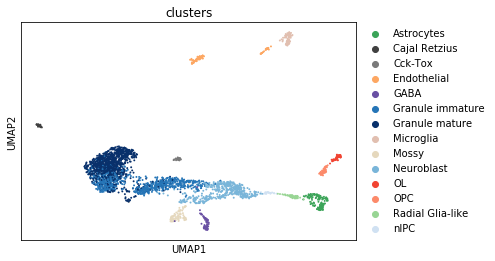

In [5]:
'''
data = scv.datasets.dentategyrus()
scv.pp.filter_genes(data, min_shared_counts=10)
scv.pp.normalize_per_cell(data)
scv.pp.filter_genes_dispersion(data, n_top_genes=3000)
scv.pp.log1p(data)
'''
data = sc.read("./data/dentate_gyrus_normalized.h5ad")

data_train,data_validate = train_test_split(data, test_size=0.2)
data_train.write("./data/dentate_gyrus_normalized_train.h5ad")
data_validate.write("./data/dentate_gyrus_normalized_validate.h5ad")
sc.pp.neighbors(data)
sc.tl.umap(data)
sc.pl.umap(data, color=["clusters"],
           legend_fontsize=10,
           save="_Dentate_cluster.png",
           show=True,
           frameon=True,
            s = 15)

In [ ]:
'''
Velocity Graph for Dentate Gyrus dataset
'''
scv.tl.velocity(data)
scv.tl.velocity_graph(data)
scv.pl.velocity_embedding_stream(data, basis='umap', color=['clusters'],figsize=(6,6),save="_velocity.png")

In [ ]:
data_train = ul.shuffle_adata(data_train)
data_validate = ul.shuffle_adata(data_validate)

In [6]:
scg_model = beta_vae.VAEArithKeras(x_dimension= data_train.shape[1],z_dimension=5,alpha=5,c_max=20)
scg_model.train(data_train, validation_data=data_validate,n_epochs=2,shuffle=True)

'''
scg_model = dhsic_vae.VAEArithKeras(x_dimension= data_train.shape[1],z_dimension=5,alpha=5,hcv_scale=20)
scg_model.train(data_train, validation_data=data_validate,n_epochs=5,shuffle=False)
'''

<tf.Variable 'Variable_1:0' shape=() dtype=float32>
Model: "VAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 4739)              0         
_________________________________________________________________
encoder (Model)              (None, 5)                 4445610   
_________________________________________________________________
decoder (Model)              (None, 4739)              4446339   
Total params: 8,891,949
Trainable params: 8,885,549
Non-trainable params: 6,400
_________________________________________________________________
Train on 2344 samples, validate on 586 samples
Epoch 1/2
2344/2344 [==============================] - 18s 8ms/step - loss: 348.0038 - kl_loss: 11.7408 - recon_loss: 323.9835 - get_c_current: 10.0000 - kl_loss_monitor0: 2.7274 - kl_loss_monitor1: 5.8839 - kl_loss_monitor2: 5.0146 - kl_loss_monitor3: 3.0173 - kl_loss_monitor4: 

'\nscg_model = dhsic_vae.VAEArithKeras(x_dimension= data_train.shape[1],z_dimension=5,alpha=5,hcv_scale=20)\nscg_model.train(data_train, validation_data=data_validate,n_epochs=5,shuffle=False)\n'